## 2024S-T3 AML 3104 - Neural Networks and Deep Learning

Instructor: Ishant Gupta

Student: Antonio Carlos De Mello Mendes - c0866063@mylambton.ca

Dataset: 

*TensorFlow. (2024). Fashion MNIST. TensorFlow. Retrieved July 9, 2024, from https://www.tensorflow.org/datasets/catalog/fashion_mnist*

## Fashion MNIST Classification with Artificial Neural Networks (ANNs) and Visualizations

In [150]:
!pip install -q -U tensorflow>=3.0.1

In [153]:
# Loading libraries
import pandas as pd
import numpy as np

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

# Import Fashion MNIST dataset from keras library
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

## Loading and explore the Dataset

In [194]:
# Split the dataset into Train images and Test images
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = datasets.fashion_mnist.load_data()

# Reshape the X_train and X_test dataset for a single channel
X_train_images = X_train_images.reshape((X_train_images.shape[0], 28, 28, 1))
X_test_images = X_test_images.reshape((X_test_images.shape[0], 28, 28, 1))

In [195]:
# This is typically found in the context of image data concerning the dimensions (28x28) of each sample with a label of 10 classes      
(X_train_images.shape, y_train_labels.shape) # The sample for training

((60000, 28, 28, 1), (60000,))

In [196]:
# The sample for testing
(X_test_images.shape, y_test_labels.shape)

((10000, 28, 28, 1), (10000,))

In [197]:
# Define the class labels 
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data processing

In [198]:
# Scaling the pixel values, assuming that is between 0 and 255 to a range between 0 and 1, 'and reshape the data'
X_train_images = X_train_images/255.0
X_test_images = X_test_images/255.0

## Visualizations

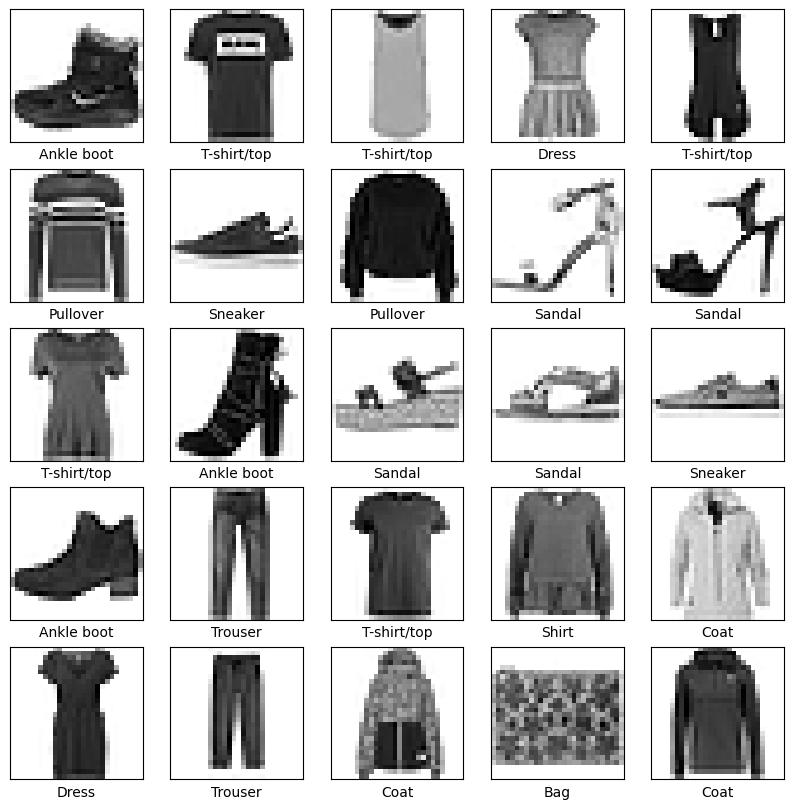

In [199]:
# Funtion to visualize the images 
def visualize_images(images, labels):
    # Define a figure with size 10 x 10
    plt.figure(figsize=(10, 10))

    # Plot the first 25 images from the dataset    
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(class_labels[labels[[i][0]]])
    plt.show()

# Plot the first 25 images from the training dataset with labels  
visualize_images(X_train_images, y_train_labels)

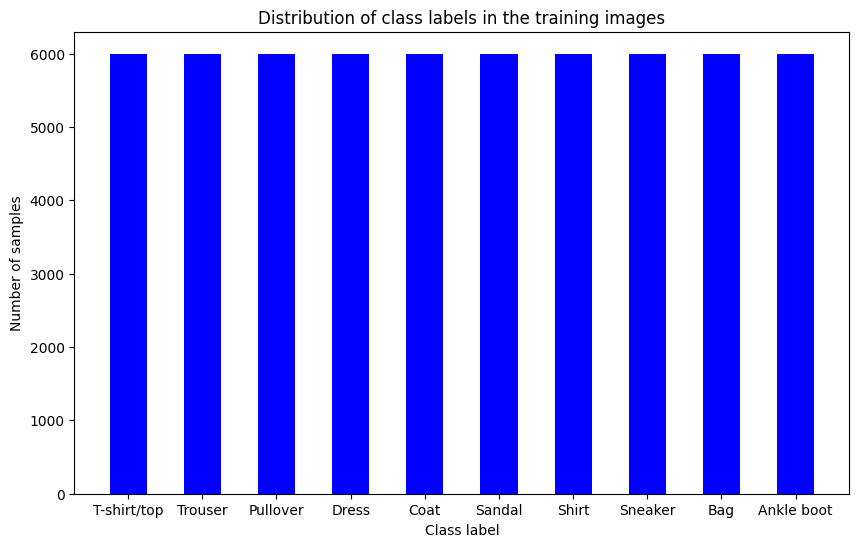

In [200]:
# Plot a bar chart for the distribution of the class labels

# Count the number of occurrences for each class
class_counts = np.bincount(y_train_labels, minlength = 10)

# Plot the bar chart
plt.figure(figsize = (10, 6))
plt.bar(class_labels, class_counts, align = 'center', width = 0.5, color = 'b')
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Distribution of class labels in the training images')
plt.xticks(class_labels)
plt.show()

## Build an Artificial Neural Network

In [201]:
# Build the model using a convolutional neural network

# Define an object of the sequence of layers
model_fmn = models.Sequential()

# Adding the first block of the convolutional and max pooling (input layer)
model_fmn.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1))) # Using pixels of images and color for input shape
model_fmn.add(layers.MaxPooling2D((2, 2)))
              
# Adding the second block of the convolutional and max pooling (intermediate layer)
model_fmn.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model_fmn.add(layers.MaxPooling2D((2, 2)))

# Adding the third block of the convolutional and max pooling (intermediate layer)
model_fmn.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model_fmn.add(layers.MaxPooling2D((2, 2)))

In [202]:
# Adding classification layers
model_fmn.add(layers.Flatten())
model_fmn.add(layers.Dense(64, activation = 'relu'))
model_fmn.add(layers.Dense(10, activation = 'softmax')) # Considering the class labels (10) that we have

In [203]:
# Model summary to check layers
model_fmn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,554 (236.54 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

In [204]:
# Compile the model

# Using loss function, optimizer, and accuracy metrics to monitor during training
model_fmn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Train the Model

In [205]:
%%time
# Using ten epochs to train the model, gathering the test data for validating 
history = model_fmn.fit(X_train_images, y_train_labels, epochs = 10, validation_data = (X_test_images, y_test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7037 - loss: 0.8020 - val_accuracy: 0.8363 - val_loss: 0.4462
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 15ms/step - accuracy: 0.8486 - loss: 0.4183 - val_accuracy: 0.8501 - val_loss: 0.4063
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8713 - loss: 0.3519 - val_accuracy: 0.8650 - val_loss: 0.3764
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8827 - loss: 0.3163 - val_accuracy: 0.8672 - val_loss: 0.3545
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8929 - loss: 0.2894 - val_accuracy: 0.8791 - val_loss: 0.3256
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9040 - loss: 0.2600 - val_accuracy: 0.8909 - val_loss: 0.3105
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9104 - loss: 0.2390 - val_accuracy: 0.8914 - val_loss: 0.3075
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9180 -

## Evaluate the Model

In [206]:
# Evaluate the model
test_loss, test_accuracy = model_fmn.evaluate(X_test_images, y_test_labels, verbose = 2) 

313/313 - 2s - 6ms/step - accuracy: 0.8937 - loss: 0.3112


In [207]:
print('\nTest accuracy: ', test_accuracy)


Test accuracy:  0.8937000036239624


In [208]:
print('\nTest loss: ', test_loss)


Test loss:  0.31124892830848694


## Test Set Prediction

In [209]:
# Display a few sample predictions along with the corresponding images

# Gathering the predictions from the test images
y_pred = model_fmn.predict(X_test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [217]:
# Loading libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert probabilities to class labels
y_pred_prob = np.argmax(y_pred, axis = 1)

print("\nAccuracy Score:", accuracy_score(y_test_labels, y_pred_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_prob))


Accuracy Score: 0.8937

Confusion Matrix:
 [[885   0  37  16   2   1  56   0   3   0]
 [  3 975   0  13   2   0   5   0   2   0]
 [ 13   0 911  12  20   0  44   0   0   0]
 [ 23   3  31 895  20   0  25   0   2   1]
 [  3   1 113  26 767   0  88   0   2   0]
 [  0   0   0   3   0 972   0  18   0   7]
 [159   2 101  15  69   1 642   0  11   0]
 [  0   0   0   0   0  10   0 976   0  14]
 [  2   0   8   2   1   5   4   2 975   1]
 [  0   0   0   0   0   6   1  54   0 939]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.91      0.83      1000
           3       0.91      0.90      0.90      1000
           4       0.87      0.77      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.74      0.64      0.69      1000
           7       0.93      0.98      0.95      1000
           8 